# Intelligent Agents: Vacuum-cleaner World

Implement a simulator environment for a vacuum-cleaner world and a set of intelligent agents.

## PEAS description

__Performance Measure:__ Each action costs 1. The performance is measured as the sum of the cost to clean the whole environment.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size of the layout of the room (i.e., it knows n and where it starts).

__Actuators:__ The agent can `clean` the current square or move to an adjacent square by going `north`, `east`, `west`, or `south`.

__Sensors:__ Four bumper sensors, one for north`, `east`, `west`, and `south`; a dirt sensor reporting dirt in the current square.  

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop untill all squares are clean or a predefined number of steps have been reached.

## Define the agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictonary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`; not specified bumpers are assumed to be `False`. E.g., if the agent is on the north-west corner, `bumpers` gets `{"north" : True, "west" : True}` or if the agent is not close to a border then it gets `{}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [1]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(style="darkgrid")


STOP_AT = 100000

In [2]:
actions = ["north", "east", "west", "south", "suck"]


def simple_randomized_agent(bumpers, dirty):
    return random.choice(actions)

In [3]:
simple_randomized_agent({"north" : True}, True)

'north'

## Simple environment example

The environment is infinite in size (bumpers are always `False`) and every square is dirty. We run the agent for 10 times steps.

In [4]:
for i in range(10):
    print(simple_randomized_agent({"north" : False, "south" : False, "west" : False, "east" : False}, True))

suck
north
suck
south
east
west
suck
west
east
west


# Tasks

_Submission Instructions:_ Use this notebook to prepare your submission. Complete this section with your code and results. You can use Markdown blocks for your description, comments in the code and use mathplotlib to produce charts. If you use external code files then you can include them with 

```
from notebook import psource
psource("your_file.py")
```

_Note:_ Try to keep the code simple! In this couse, we want to learn about the algorithms and we often do not need to use object-oriented design. 


## Task 1: Implement a simulation environment

Your environment simulator needs to create squares, make some dirty, and proivde the agent function with the sensor inputs. The environment needs to evaluate the performance measure. It needs to track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The simulation environment needs to work with the simple randomized agent program from above.

In [5]:
def room(agent, grid_size = 5, dirt_p = 0.2, max_steps = STOP_AT, verbose = True):
    
    global pos
    pos = [0,0]
    
    grid = np.random.choice([True, False], p=[dirt_p, 1-dirt_p], size=(grid_size, grid_size))
    if verbose: print ('Floor Grid: \n', grid)
    
    toClean = np.sum(grid)
    if verbose: print ('Dirty squares: ', toClean)
    
    if verbose: print('Simulation')
    
    for i in range(max_steps):
    
        if toClean < 1: break
            
        bumpers = {
            "north": pos[0] == 0,
            "south": pos[0] == grid_size - 1,
            "west" : pos[1] == 0,
            "east" : pos[1] == grid_size - 1
        }

        dirty = grid[pos[0], pos[1]]

        if verbose:
            print('------------')
            print('step:', i)
            print('position:', pos)
            print('bumpers:', bumpers)
            print('dirty:', dirty)

        action = agent(bumpers, dirty)
        if verbose: print('action:', action)

        if (action == "north" and pos[0] > 0):               pos[0] = pos[0] - 1
        elif (action == "south" and pos[0] < (grid_size-1)): pos[0] = pos[0] + 1
        elif (action == "east" and pos[1] < (grid_size-1)):  pos[1] = pos[1] + 1
        elif (action == "west" and pos[1] > 0):              pos[1] = pos[1] - 1
        elif (action == "suck" and dirty):                   grid[pos[0],pos[1]] = False

        toClean = np.sum(grid)
        if verbose: print ('Dirty squares: ', toClean)
    return (i+1)  

## Task 2:  Implement a simple reflex agent

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking.

In [6]:
def simple_reflex_agent(bumpers, dirty):
    if (dirty): return 'suck'
    
    aval_actions = [i for i in bumpers if bumpers[i] is False]
    return random.choice(aval_actions)

## Task 3: Implement a model-based reflex agent 

This agent keeps track of the location and remembers where it has cleaned. Assume the agent knows how many squares the room has and where it starts. It can now use more advanced navigation.

_Note on implementing the state:_ You can use a global variable. In Python, you have to use the keyword `global` in your function for this to work (see: https://www.programiz.com/python-programming/global-keyword). Alternatively, you can define a class for your agent with a member variable for the state and a function for the agent program (see: https://www.w3schools.com/python/python_classes.asp). 

Describe how your agent will perform 
* if it is put into a larger room, 
* if the room contains obstacles, or 
* if it starts in a random square.

In [7]:
def model_based_reflex_agent(bumpers, dirty):
    if (dirty): return 'suck'
    
    if pos[0] % 2 == 0:
        if bumpers['east'] == False:
            return 'east'
        return 'south'
    else:
        if bumpers['west'] == False:
            return 'west'
        return 'south'

This agent will visits each square only once, starting from the north-west square going to the east most cell, then south, then going to the west most cell and so on. The squares that contain dirt will excute 'suck' before the agent moves on the next square.
* If put in a large room, this agent will perform extremely better that then previous two agents as proven by the charts below.
* If the room contains obstacles, the agent will not succeed as it will treat obstacles as a wall and will drop to the row bellow, missing the rest of the squares in the obstacle row.
* If it starts in a random square, the agent will perform good from the start square to the bottom of the room, but will ignore all the squares before the starting square.

## Task 4: Simulation study

Compare the performance of the agents using different size environments. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use at least 100 random runs for each.

In [8]:
def chart_data(agent, room_size, runs = 100):
    
    steps = np.repeat(0,runs)
    for i in range(runs):
        steps[i] = room(agent, room_size, verbose = False)
    
    print ('Mean', np.mean(steps))
    
    plt.hist(steps, bins= 10, linewidth=0.1)
    plt.xlabel('steps')
    plt.ylabel('frequency')
    plt.show()

-----------
room size: 5 X 5
-----------
Simple randomized agent
Mean 461.96


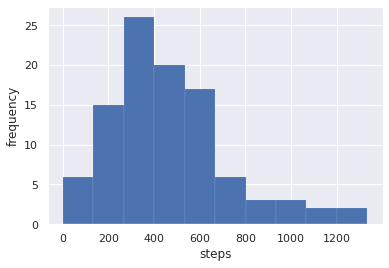

Simple reflect agent
Mean 97.68


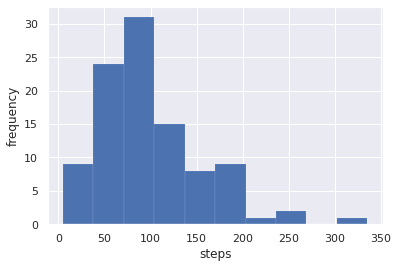

Model based agent
Mean 25.67


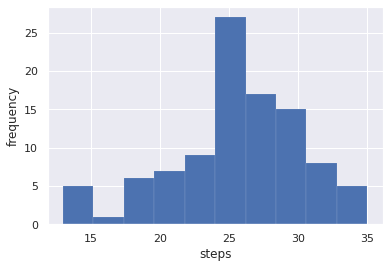

-----------
room size: 10 X 10
-----------
Simple randomized agent
Mean 3106.78


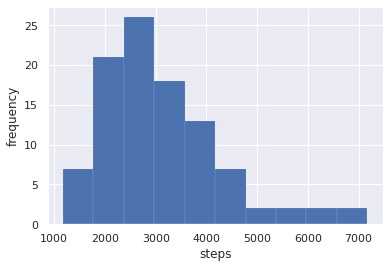

Simple reflect agent
Mean 867.79


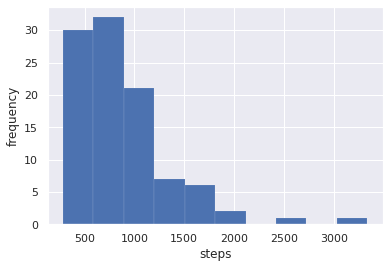

Model based agent
Mean 117.67


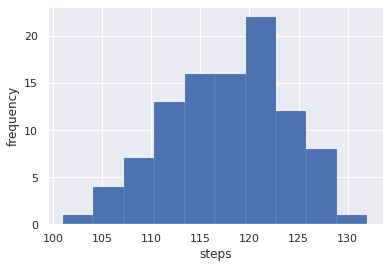

-----------
room size: 100 X 100
-----------
Simple randomized agent
Mean 100000.0


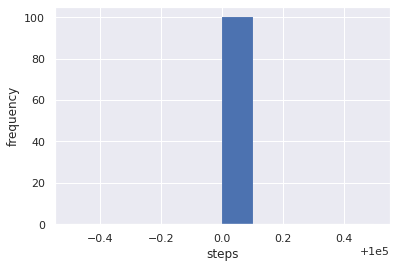

Simple reflect agent
Mean 100000.0


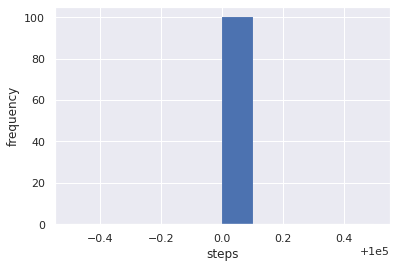

Model based agent
Mean 11989.62


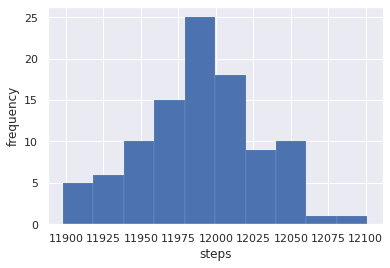

In [9]:
room_size = [5,10,100]

for size in room_size:
    print('-----------')
    print ("room size:", size , "X" , size)
    print('-----------')
    
    print('Simple randomized agent')
    chart_data(simple_randomized_agent, room_size = size)
    print('Simple reflect agent')
    chart_data(simple_reflex_agent, room_size = size)
    print('Model based agent')
    chart_data(model_based_reflex_agent, room_size = size)

The above charts show that the Model based agent has an overall better performace that the other two agents. The gap between the performances increase exponentially with the increase in the room size. In the 100x100 room size test, the Simple randomized agent and Simple reflect agent reached the maximum number of steps (100,000) while the Model based agent cleaned the room in almost (12,000) steps.

## Bonus tasks

* __Obstacles:__ Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.
* __Unknown environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square.
* __Utility-based agent:__ Change the environment, so each square has a fixed probability of getting dirty again. We assume the agent has learned this information over time. For the implementation, we give this information to the agent as a 2-dimensional array of probabilities  Cleaning one dirty square produces a utility of 1. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 10000 time steps. This is very tricky!